In [63]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
from sklearn.datasets import load_iris
li = load_iris()

In [65]:

li.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
df = pd.DataFrame(li.data,columns = li.feature_names)

In [67]:
df['target'] = li.target

In [68]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [69]:
df.target.unique()

array([0, 1, 2], dtype=int64)

In [70]:
df['target'] = df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [71]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [72]:
X = df.drop(columns = 'target',axis = 1)
y = df['target']

In [73]:
# all 4 dimensions are standardized with mean 0 and stardard deviation as 1
X_std = StandardScaler().fit_transform(X)

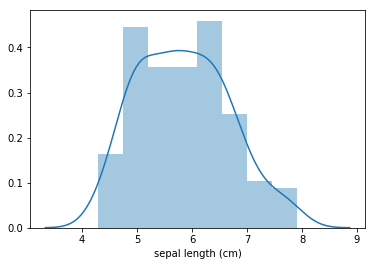

In [74]:
# without standardization 
sns.distplot(df['sepal length (cm)'])

In [75]:
df_std = pd.DataFrame(X_std,columns = li.feature_names)

In [76]:
df_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


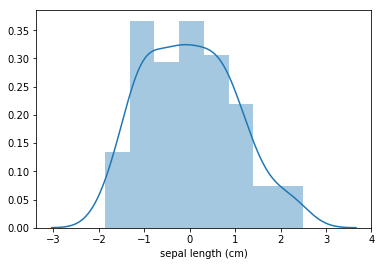

In [78]:
# with standardization 
sns.distplot(df_std['sepal length (cm)'])

In [79]:
# now take a back step and do a PCA with no reduction in dimensionality just to check variance for each dimensions
# lets do it

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_std)

In [81]:
# dataframe with X_pca 
df_pca = pd.DataFrame(X_pca,columns = li.feature_names)

In [84]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

# PCA feasibility

print(pca.explained_variance_ratio_)

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

with "explained_variance_ratio_" function we can easily find out how much dimensionality reduction is possible without loosing to much information.

Principle component 1 and 2, has more variance compare to 3 and 4. so we can take risk to remove 2 dimensions possibly.


In [91]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_std)

In [94]:
df_pca_2 = pd.DataFrame(X_pca_2,columns = ['PC1','PC2'])

In [96]:
df_pca_2.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


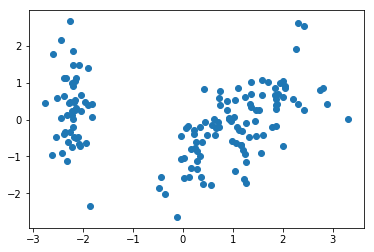

In [98]:
plt.scatter(df_pca_2.PC1,df_pca_2.PC2)

Successfully reduced the dimensinality without losing to much of information . almost 97 % of variance is picked by PC1 and PC2.